# Circuit Set-Up

C:\Users\bagge\AppData\Local\Temp\ipykernel_22376\1964049079.py:20: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  circuit.i([i for i in range(n)])
C:\Users\bagge\anaconda3\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


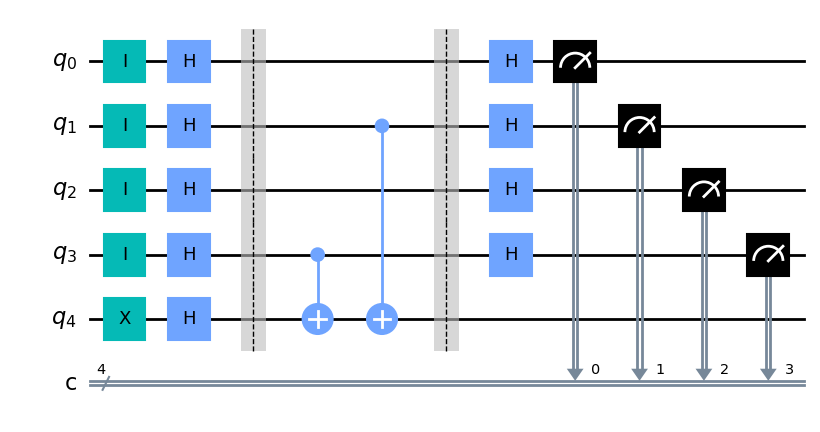

In [19]:
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
%matplotlib inline

s = 1010

# Get number of digits
n = len(str(s))

# Create circuit with n+1 qubits
circuit = QuantumCircuit(n+1,n)
# circuit.draw("mpl")

# Set qubit n to state |1>
circuit.x(n)

# Personal preference for visualizing the circuit
# Add identity gates on the unaffected qubits
circuit.i([i for i in range(n)])

# Apply Hadamard gates on all qubits
circuit.h([i for i in range(n+1)])
# circuit.draw("mpl")

# Add barrier for easier distinction of the oracle
circuit.barrier()

# Create the oracle (CNOT gate where s has 1s, applied on the nth qubit)
circuit.cx(3, n)
circuit.cx(1,n)

# Add barrier for easier distinction of the oracle
circuit.barrier()

# Apply Hadamard gates on the first n qubits to stop superposition
circuit.h([i for i in range(n)])

# Measure n first qubits
circuit.measure([i for i in range(n)], [i for i in range(n)])

circuit.draw("mpl")


# Running on Simulator

In [23]:
# Run on qiskit simulator
sim = Aer.get_backend("qasm_simulator")
res = execute(circuit, backend=sim, shots=1).result()
counts = res.get_counts()
counts

{'1010': 1}

# Running on Quantum Hardware

Job Status: job has successfully run


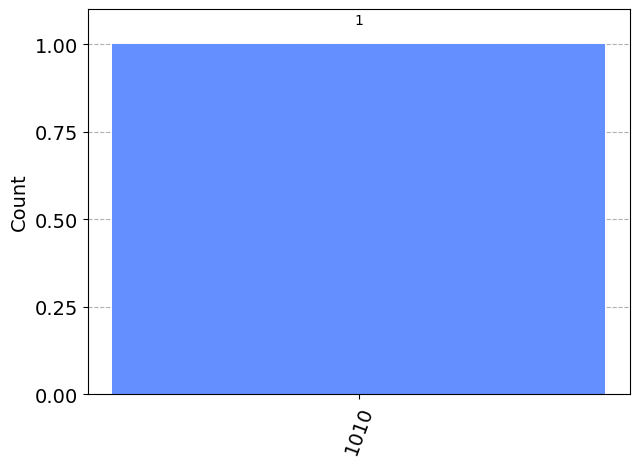

In [27]:
from qiskit.tools.monitor import job_monitor

# Load account settings from previous experiments
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')

# Choose machine
device = provider.get_backend('ibm_sherbrooke')

# Queue up job (avg. expected time ~ 1hr)
job = execute(circuit,backend = device,shots = 1)
job_monitor(job)

device_result = job.result()

plot_histogram(device_result.get_counts(circuit))